In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
plt.rcParams['figure.figsize'] = [18, 9]

# CARGA DATASET B&W

(10, 1080, 1920)


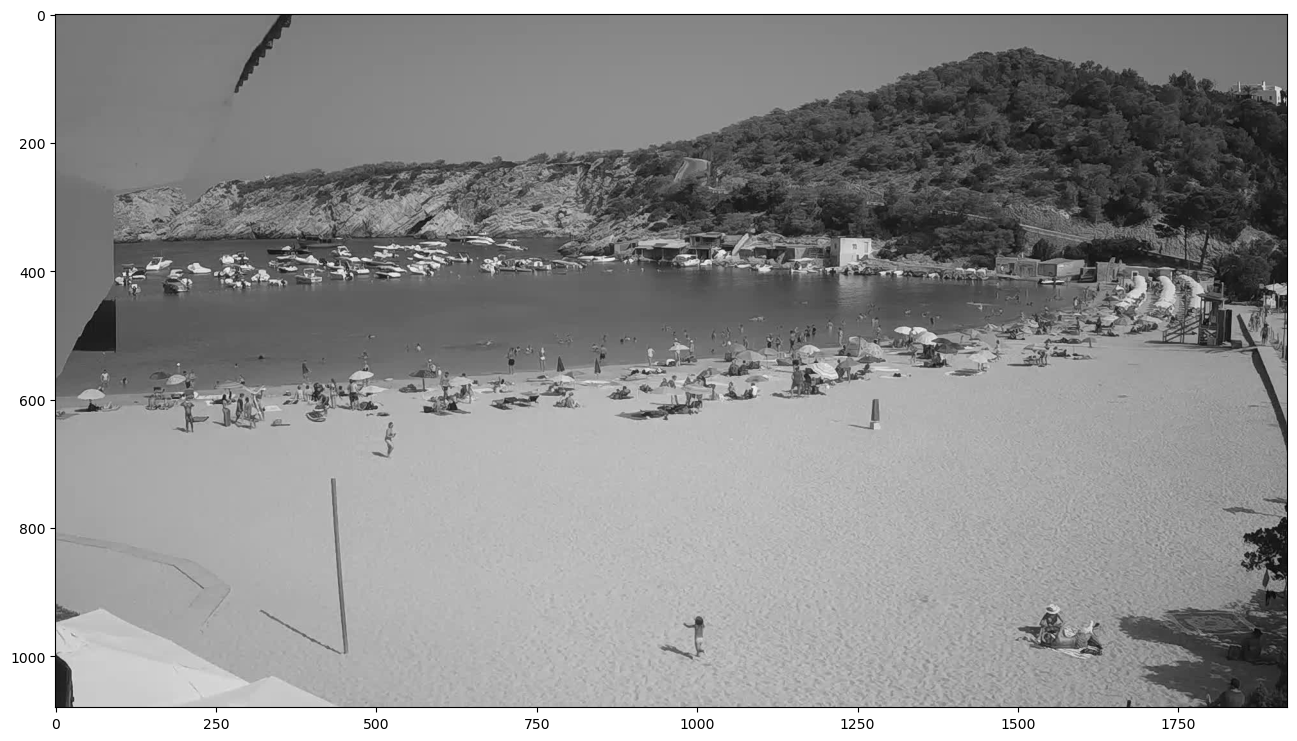

In [2]:
image_filenames = os.listdir("data")
for i in range(len(image_filenames)):
    image_filenames[i] = "data/" + image_filenames[i]

image_stack = np.stack([cv2.imread(filename, cv2.IMREAD_GRAYSCALE) for filename in image_filenames], axis=2)

image_stack = np.transpose(image_stack, (2, 0, 1))

print(image_stack.shape)
plt.imshow(image_stack[0], cmap = "gray")

## Modifiacion de histograma clahe
## Diferencia con playa vacia
## Recorte de montaña y barcos

(-0.5, 1919.5, 1079.5, -0.5)

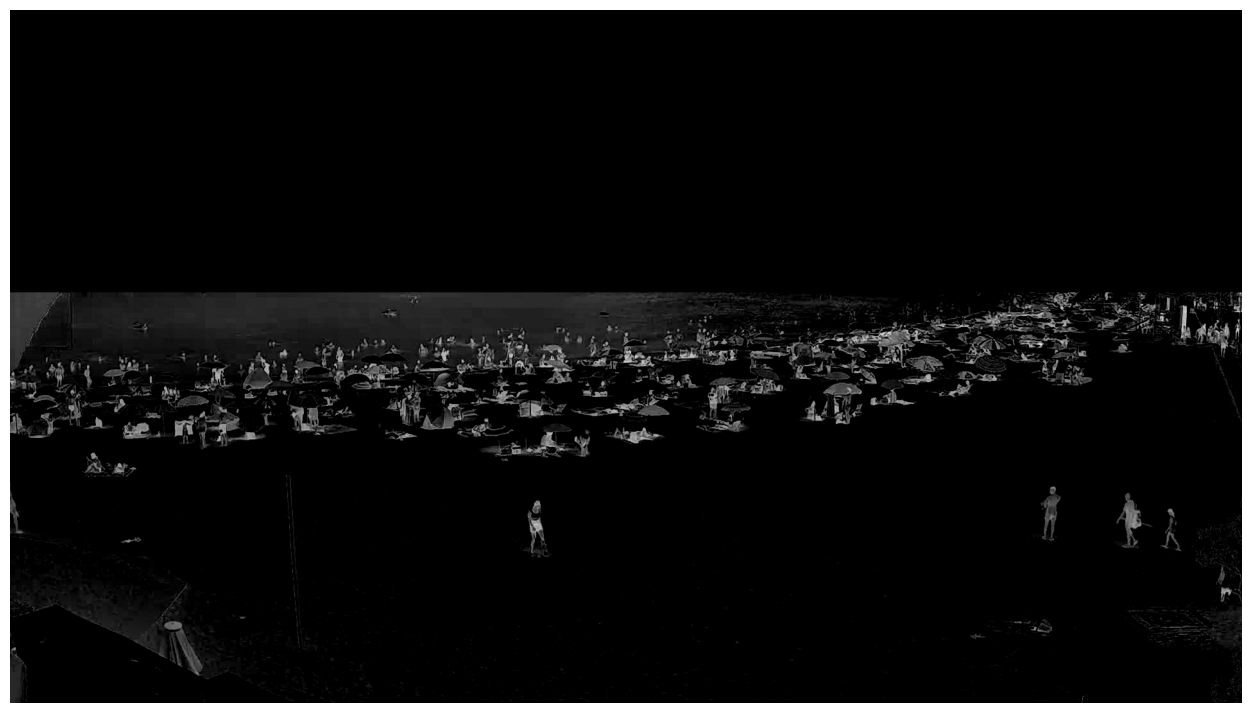

In [3]:
clahe = cv2.createCLAHE(clipLimit=1)

image_mod_3 = image_stack[3].copy()
image_mod_3[0:440,:] = 0

image_mod_9 = image_stack[9].copy()
image_mod_9[0:440,:] = 0

image_mod_4 = image_stack[4].copy()
image_mod_4[0:440,:] = 0

empty_beach_3 = clahe.apply(image_mod_3)

empty_beach_9 = clahe.apply(image_mod_9)

test_image_1 = clahe.apply(image_mod_4)

kernel_blur = (11,11)



subs_image = cv2.subtract(empty_beach_9, test_image_1)

plt.imshow(subs_image, cmap = "gray")
plt.axis('off')

# TOPHAT

(-0.5, 1919.5, 1079.5, -0.5)

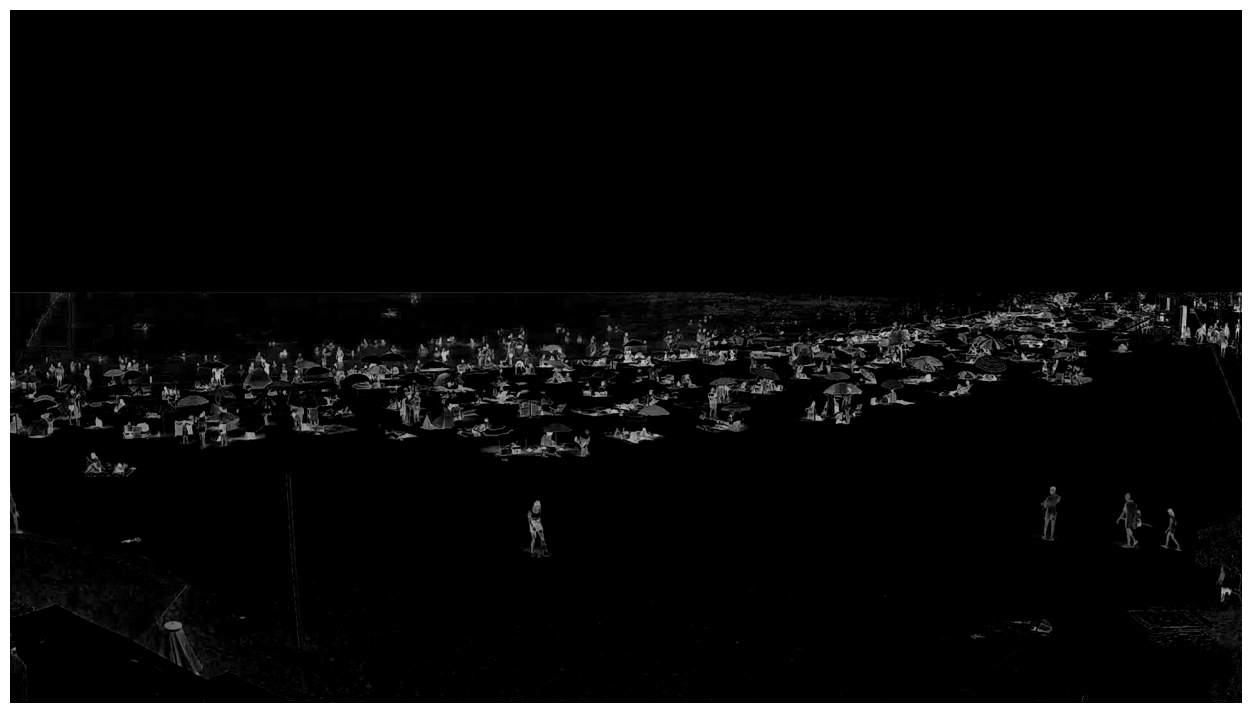

In [4]:
kernelSize = (10,18)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
tophat = cv2.morphologyEx(subs_image, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap="gray")
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

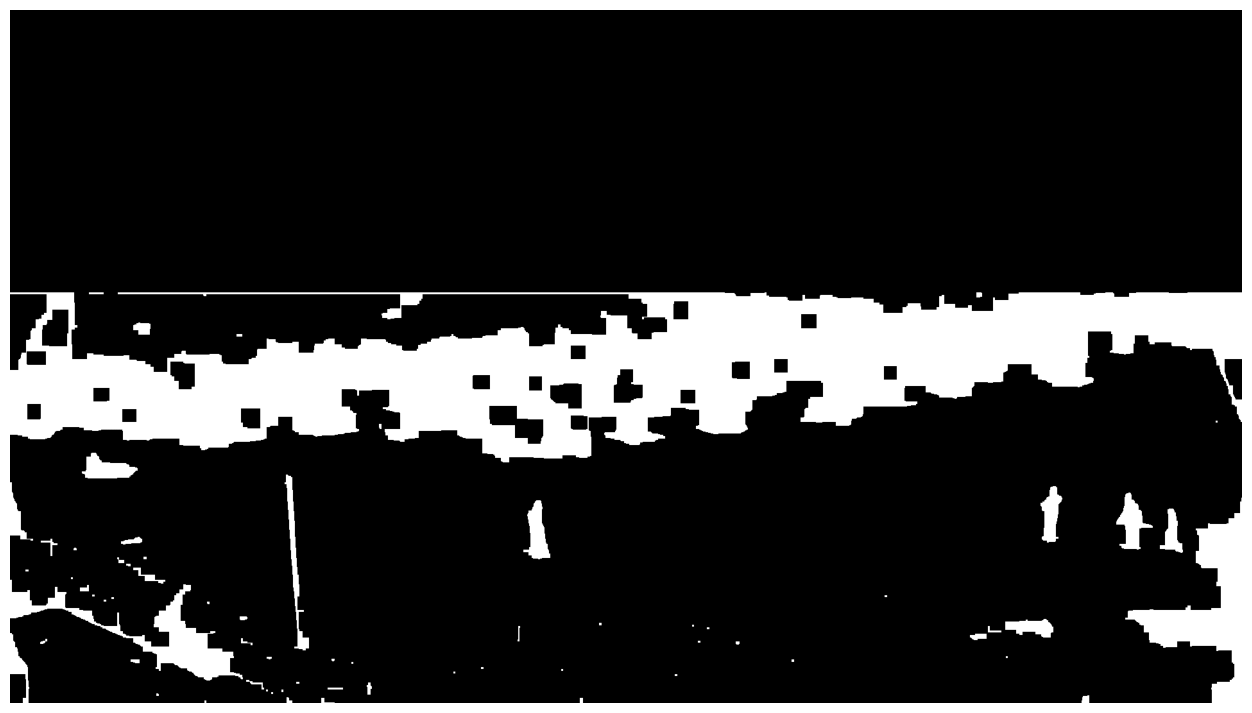

In [64]:


_, bin = cv2.threshold(tophat, 16, 255, cv2.THRESH_BINARY)

kernelSize_dil = (3,3)
kernel_dil = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_dil)
bin = cv2.dilate(bin,kernel_dil,iterations = 1)

kernelSize_close = (20,20)
kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_close)
bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, kernel_close)

plt.imshow(bin, cmap="gray")
plt.axis('off')


## FUNCTION

In [5]:
def min_max_norm(image):
    min_val = np.min(image)
    max_val = np.max(image)

    norm_image = (image - min_val) / (max_val - min_val)
    return norm_image


def divide_img_sectors(image):
    # Find boundaries
    
    img_size = image.shape
    sqrt_arr = np.sqrt(np.linspace(1,img_size[0],8, dtype = np.int_))
    norm_arr = min_max_norm(sqrt_arr)
    cut_boundaries = img_size[0] - (norm_arr * img_size[0]).astype(int)

    
    tmp = np.repeat(cut_boundaries, 2)[1:-1]
    cut_boundaries_paris = tmp[:(len(tmp) // 2 + 1) * 2].reshape(-1, 2)
    image_list_sectors = []

    for pair_i in cut_boundaries_paris:
        img = image[pair_i[1]:pair_i[0],:].copy()
        image_list_sectors.append(img)

    return image_list_sectors

In [213]:
def find_people_0(image):

    _, bin = cv2.threshold(image, 16, 255, cv2.THRESH_BINARY)

    kernelSize_dil = (3,3)
    kernel_dil = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_dil)
    bin = cv2.dilate(bin,kernel_dil,iterations = 1)

    kernelSize_open = (6,8)
    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_open)
    bin = cv2.morphologyEx(bin, cv2.MORPH_OPEN, kernel_open)
    
    kernelSize_close = (20,20)
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_close)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, kernel_close)

    return bin

def find_people_1(image):

    _, bin = cv2.threshold(image, 16, 255, cv2.THRESH_BINARY)

    kernelSize_dil = (3,3)
    kernel_dil = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_dil)
    bin = cv2.dilate(bin,kernel_dil,iterations = 1)

    kernelSize_open = (5,7)
    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_open)
    bin = cv2.morphologyEx(bin, cv2.MORPH_OPEN, kernel_open)
    
    kernelSize_close = (20,20)
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_close)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, kernel_close)

    return bin

def find_people_2(image):

    _, bin = cv2.threshold(image, 16, 255, cv2.THRESH_BINARY)

    kernelSize_dil = (3,3)
    kernel_dil = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_dil)
    bin = cv2.dilate(bin,kernel_dil,iterations = 1)

    kernelSize_open = (2,2)
    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_open)
    bin = cv2.morphologyEx(bin, cv2.MORPH_OPEN, kernel_open)
    
    kernelSize_close = (15,15)
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_close)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, kernel_close)

    return bin


def find_people_3(image):

    _, bin = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY)

    kernelSize_dil = (2,2)
    kernel_dil = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_dil)
    bin = cv2.erode(bin,kernel_dil,iterations = 1)

    
    kernelSize_close = (8,12)
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_close)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, kernel_close)

    kernelSize_open = (5,5)
    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_open)
    bin = cv2.morphologyEx(bin, cv2.MORPH_OPEN, kernel_open)

    return bin

def find_people_4(image):

    _, bin = cv2.threshold(image, 20, 255, cv2.THRESH_BINARY)


    
    kernelSize_open = (6,3)
    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_open)
    bin = cv2.morphologyEx(bin, cv2.MORPH_OPEN, kernel_open)


    kernelSize_close = (7,8)
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_close)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, kernel_close)


    
    



    return bin

def find_people_5(image):

    _, bin = cv2.threshold(image, 70, 255, cv2.THRESH_BINARY)


    kernelSize_close = (5,5)
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_close)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, kernel_close)

    kernelSize_open = (3,3)
    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_open)
    bin = cv2.morphologyEx(bin, cv2.MORPH_OPEN, kernel_open)



    return bin

def find_people_6(image):

    _, bin = cv2.threshold(image, 70, 255, cv2.THRESH_BINARY)

    kernelSize_close = (7,7)
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_close)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, kernel_close)

    kernelSize_dil = (4,4)
    kernel_dil = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_dil)
    bin = cv2.dilate(bin,kernel_dil,iterations = 1)



    return bin

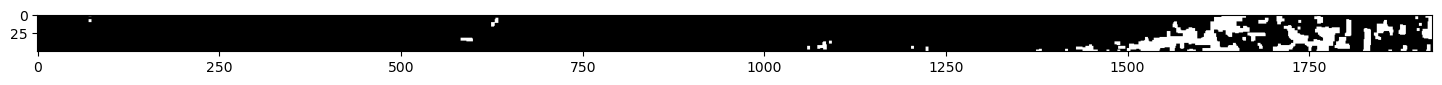

In [214]:
image_mod = tophat[440:,:].copy()
img_sectors = divide_img_sectors(image_mod)
tmp = find_people_6(img_sectors[6])


plt.imshow(tmp, cmap = "gray")

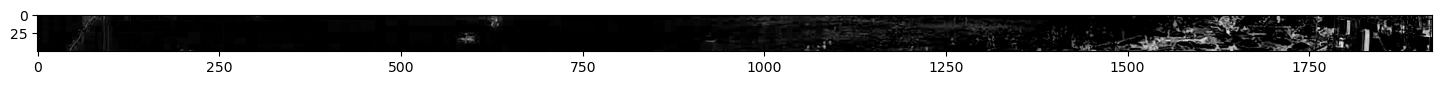

In [190]:
plt.imshow(img_sectors[6], cmap = "gray")

size ins: 414
img shape: (226, 1920)
size ins: 311
img shape: (103, 1920)
size ins: 231
img shape: (80, 1920)
size ins: 163
img shape: (68, 1920)
size ins: 104
img shape: (59, 1920)
size ins: 50
img shape: (54, 1920)
size ins: 0
img shape: (50, 1920)


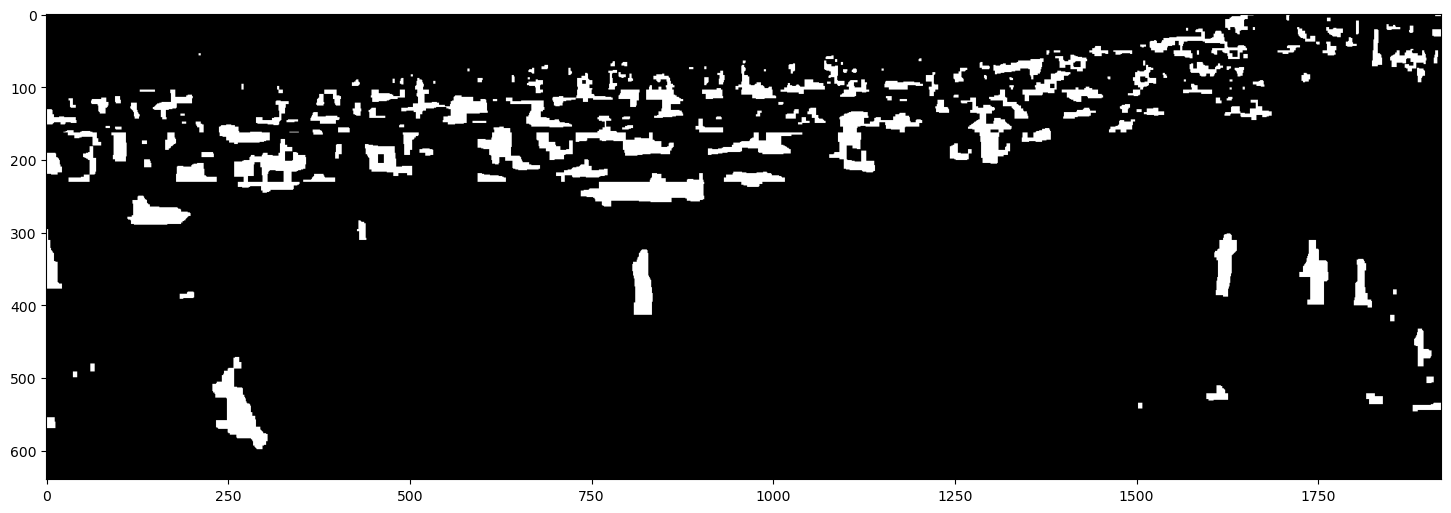

In [234]:
canvas = np.zeros(image_mod.shape, dtype = np.uint8)
p_sector_list = [None] * 7
p_sector_list[0] = find_people_0(img_sectors[0])
p_sector_list[1] = find_people_1(img_sectors[1])
p_sector_list[2] = find_people_2(img_sectors[2])
p_sector_list[3] = find_people_3(img_sectors[3])
p_sector_list[4] = find_people_4(img_sectors[4])
p_sector_list[5] = find_people_5(img_sectors[5])
p_sector_list[6] = find_people_5(img_sectors[6])

canvas_h = canvas.shape[0]

pos_h = 0
for img in p_sector_list:


    top_h = canvas_h - (pos_h + img.shape[0])
    bot_h = canvas_h - (pos_h)
    canvas[top_h:bot_h,:] = img
    pos_h += img.shape[0]

plt.imshow(canvas, cmap = "gray")

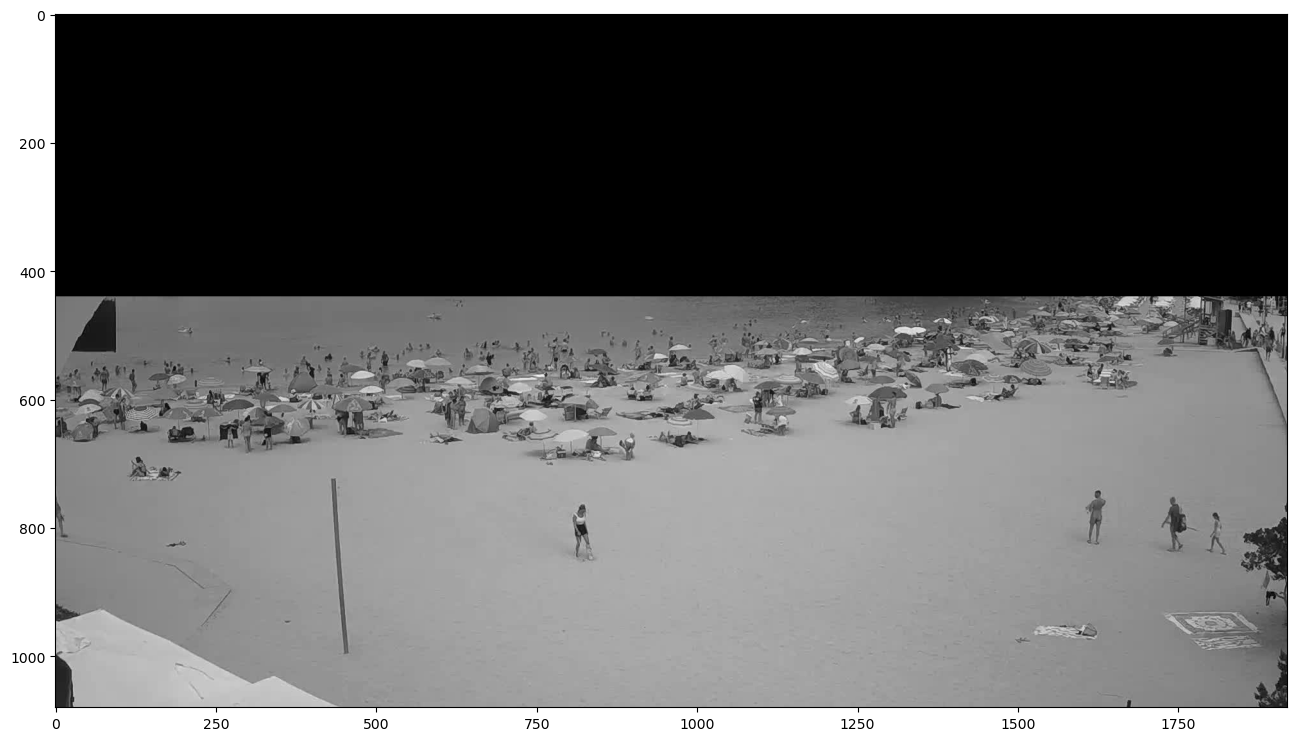

In [235]:
plt.imshow(image_mod_4, cmap = "gray")

(1080, 1920, 10, 3)


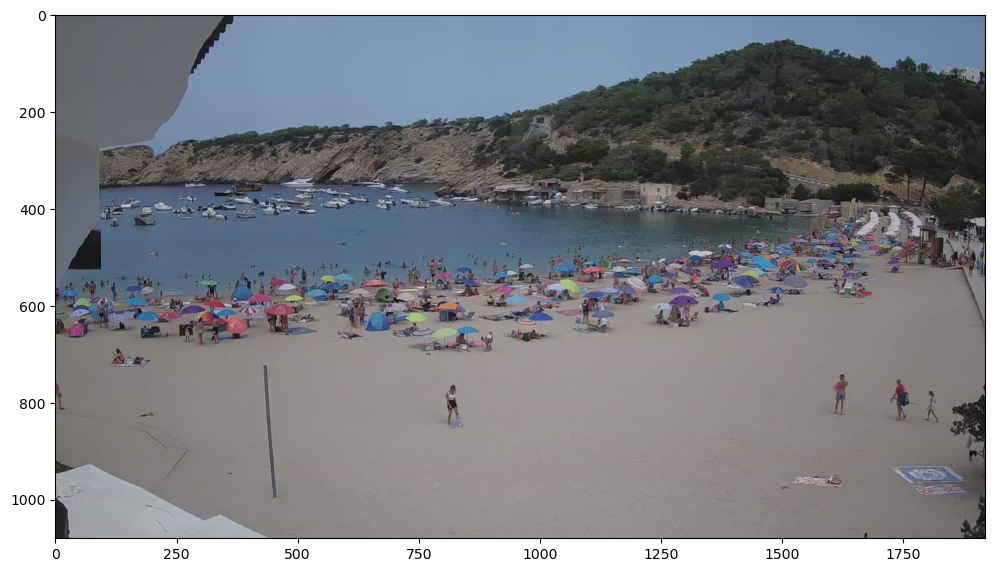

In [237]:
image_filenames = os.listdir("data")
for i in range(len(image_filenames)):
    image_filenames[i] = "data/" + image_filenames[i]

image_stack_color = np.stack([cv2.cvtColor(cv2.imread(filename),cv2.COLOR_RGB2BGR) for filename in image_filenames], axis=2)

print(image_stack_color.shape)
image_stack_color = np.transpose(image_stack_color, (2, 0, 1, 3))


fig = plt.figure(figsize=(12, 10))
plt.imshow(image_stack_color[4], cmap = "gray")

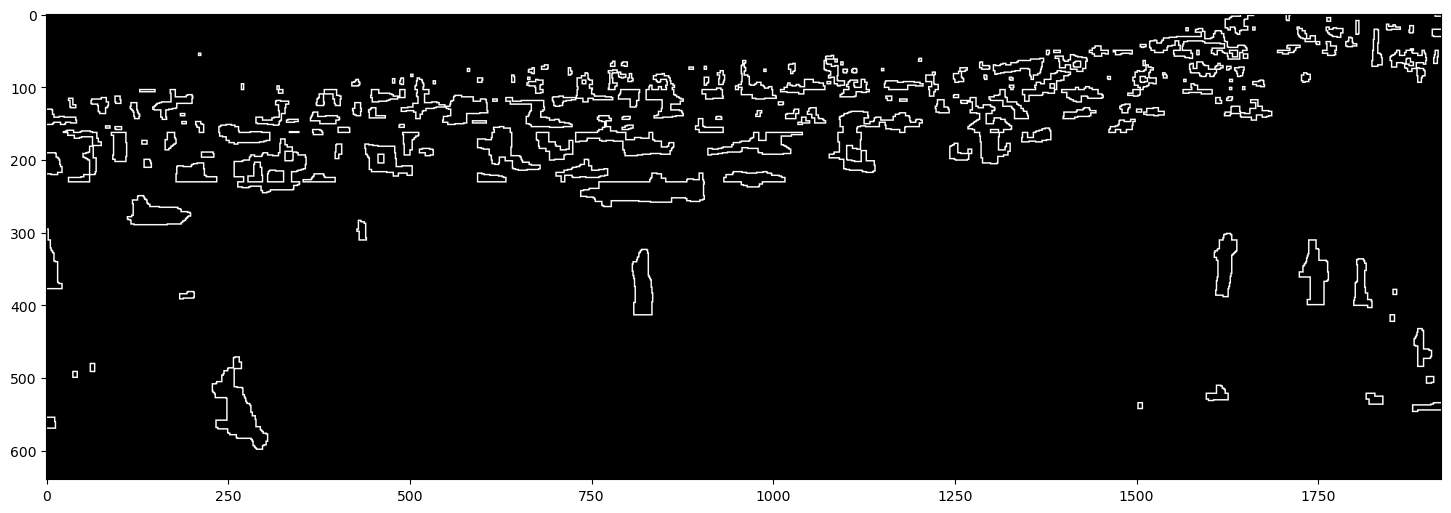

In [240]:
kernelSize_close = (3,3)
kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize_close)
to_draw = cv2.morphologyEx(canvas, cv2.MORPH_GRADIENT, kernel_close)

plt.imshow(to_draw, cmap = "gray")

(-0.5, 1919.5, 1079.5, -0.5)

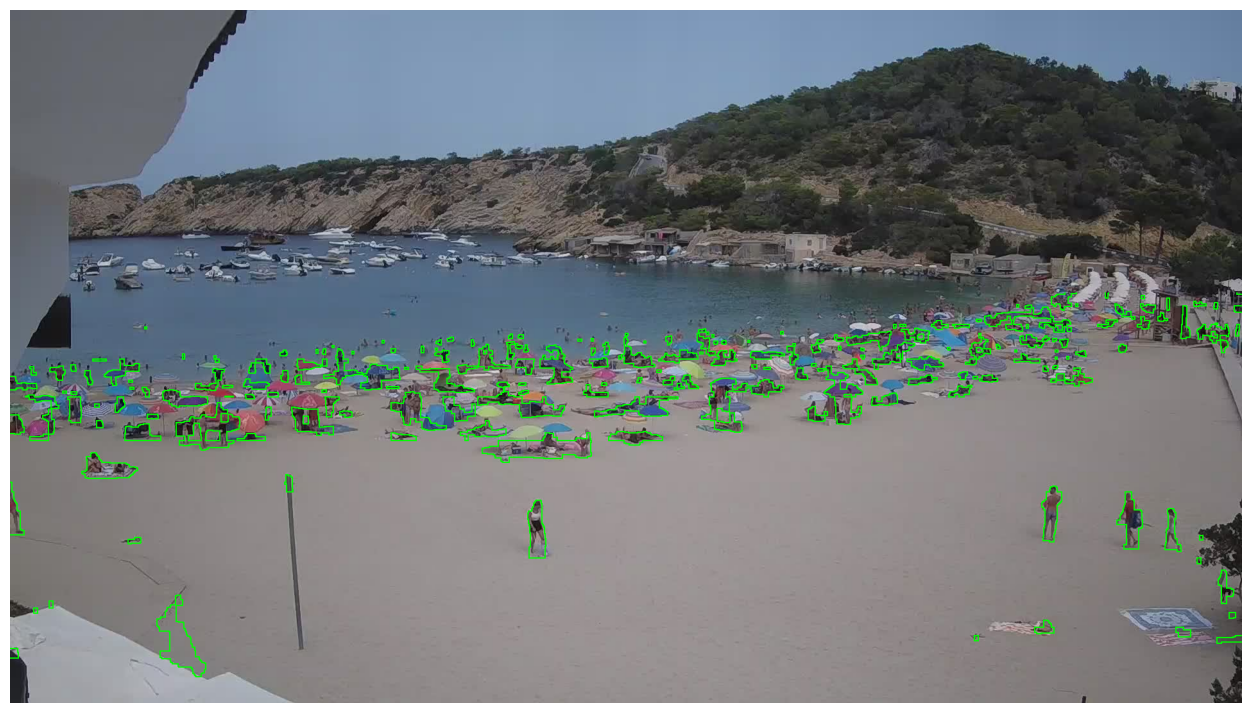

In [252]:
image_detected = image_stack_color[4].copy()

to_draw_bool = np.zeros(image_detected.shape[0:2], dtype=bool)

to_draw_bool[440:,:] = to_draw == 255



image_detected[to_draw_bool] = (0,255,0)


plt.imshow(image_detected)
plt.axis('off')

(1080, 1920)